<a href="https://colab.research.google.com/github/najnin26/Data-Mining/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [7]:
df.isnull().any()

,0
Hours,False
Scores,False


In [8]:
df.isnull().sum()

,0
Hours,0
Scores,0


In [9]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.dtypes

,0
Hours,float64
Scores,int64


In [11]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

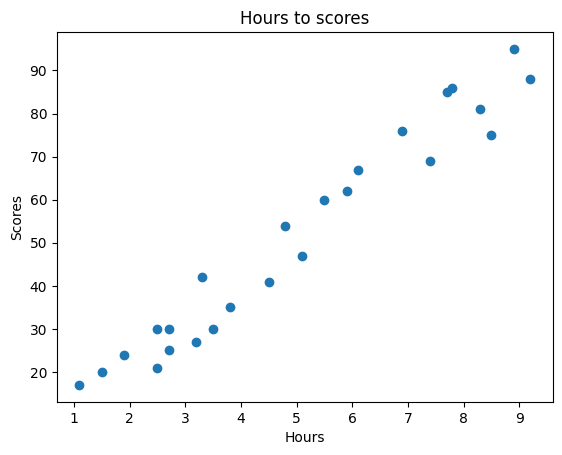

In [12]:
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours to scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

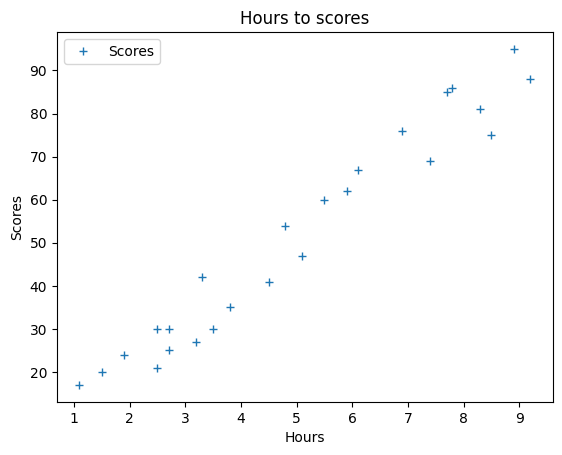

In [13]:
df.plot('Hours','Scores',style='+')
plt.title('Hours to scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [14]:
X=df.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y=df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [18]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88])

In [19]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
pred=lr.predict(X_test)

In [21]:
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [22]:
lr.coef_

array([9.68207815])

In [23]:
lr.intercept_

2.826892353899737

In [24]:
new_df=pd.DataFrame({"Actual":y_test,"Predicted":pred})

In [25]:
new_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


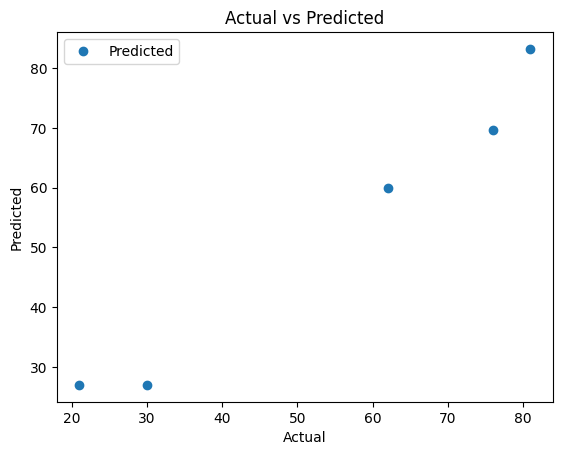

In [31]:
new_df.plot('Actual','Predicted',style='o')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

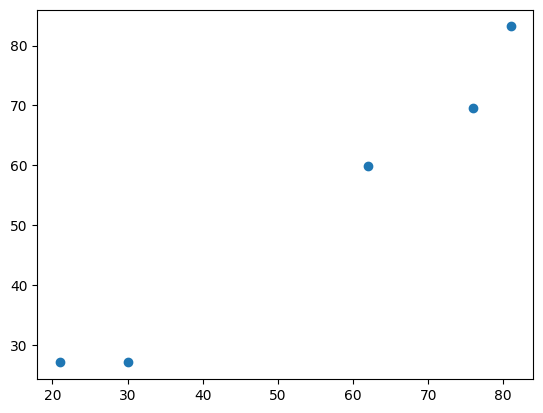

In [32]:
plt.scatter(y_test,pred)

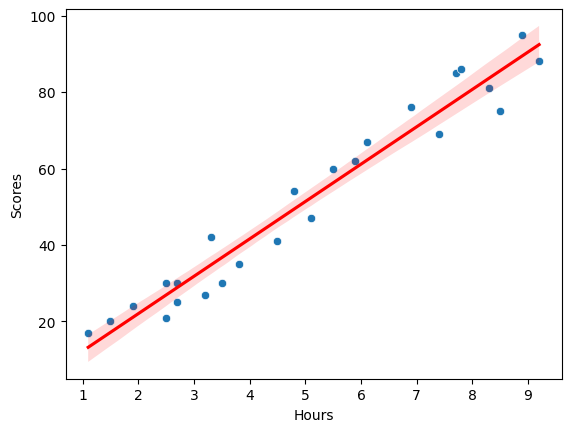

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='Hours', y='Scores', data=df)

# Regression line
sns.regplot(x='Hours', y='Scores', data=df,scatter=False,  color='red')

# Show plot
plt.show()

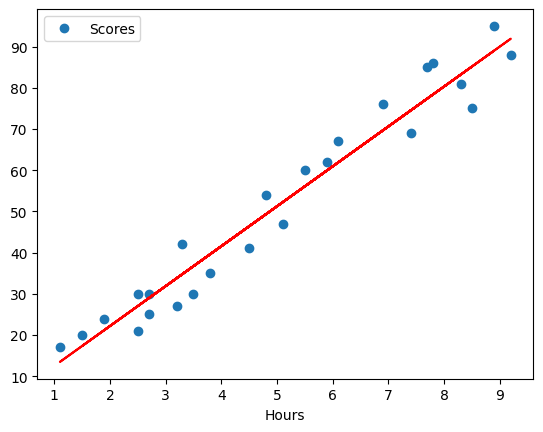

In [38]:
df.plot('Hours','Scores',style='o')
y=lr.coef_*df['Hours']+lr.intercept_
plt.plot(df['Hours'],y,color='red')
plt.show()

In [39]:
from sklearn import metrics

print("Mean absolute error :",metrics.mean_absolute_error(y_test,pred))
print("Mean absolute error :",metrics.mean_squared_error(y_test,pred))

Mean absolute error : 3.9207511902099244
Mean absolute error : 18.943211722315272


In [40]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

4.352380006653288